# CatBoost时间序列预测
## 任务目标
1. 实现基于CatBoost的时间序列预测
2. 评估模型性能(MAE, RMSE, MAPE, R²)
3. 分析特征重要性
4. 可视化预测结果

In [16]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
import seaborn as sns

# 设置绘图风格
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 支持中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
%matplotlib inline

In [17]:
# 加载五种特征数据集
datasets = {
    '基础实验': pd.read_csv('../data/processed/basic_features.csv', parse_dates=['Datetime']),
    '增强实验': pd.read_csv('../data/processed/enhanced_features.csv', parse_dates=['Datetime']),
    '综合实验': pd.read_csv('../data/processed/comprehensive_features.csv', parse_dates=['Datetime']),
    '消融实验': pd.read_csv('../data/processed/ablation_features.csv', parse_dates=['Datetime']),
    '全部特征': pd.read_csv('../data/processed/all_features.csv', parse_dates=['Datetime'])
}

# 展示各数据集特征
print("=== 五种特征数据集 ===")
for name, df in datasets.items():
    print(f"\n{name} - 特征数量: {len(df.columns)-1}")
    print("特征列表:", [col for col in df.columns if col != 'PJM_Load'])
    print(f"时间范围: {df['Datetime'].min()} 到 {df['Datetime'].max()}")
    print(f"样本数量: {len(df)}")

# 展示基础实验数据集前5行
print("\n基础实验数据集示例:")
datasets['基础实验'].head()

=== 五种特征数据集 ===

基础实验 - 特征数量: 6
特征列表: ['Datetime', 'hour', 'dayofweek', 'month', 'dayofyear', 'weekofyear']
时间范围: 1998-04-01 01:00:00 到 2002-01-01 00:00:00
样本数量: 32896

增强实验 - 特征数量: 7
特征列表: ['Datetime', 'hour', 'dayofweek', 'month', 'dayofyear', 'weekofyear', 'is_holiday']
时间范围: 1998-04-01 01:00:00 到 2002-01-01 00:00:00
样本数量: 32896

综合实验 - 特征数量: 10
特征列表: ['Datetime', 'hour', 'dayofweek', 'month', 'dayofyear', 'weekofyear', 'is_holiday', 'rolling_mean_24h', 'rolling_mean_7d', 'rolling_std_7d']
时间范围: 1998-04-01 01:00:00 到 2002-01-01 00:00:00
样本数量: 32896

消融实验 - 特征数量: 6
特征列表: ['Datetime', 'hour', 'dayofweek', 'month', 'dayofyear', 'weekofyear']
时间范围: 1998-04-01 01:00:00 到 2002-01-01 00:00:00
样本数量: 32896

全部特征 - 特征数量: 28
特征列表: ['Datetime', 'dayofweek', 'hour', 'PJM_Load_processed', 'month', 'quarter', 'dayofyear', 'hour_sin', 'hour_cos', 'doy_sin', 'doy_cos', 'is_weekend', 'is_night', 'is_morning_peak', 'is_evening_peak', 'is_holiday', 'lag_1', 'lag_2', 'lag_3', 'lag_24', 'lag_48', 'lag_16

,Datetime,PJM_Load,hour,dayofweek,month,dayofyear,weekofyear
0,1998-04-01 01:00:00,22259.0,1,2,4,91,14
1,1998-04-01 02:00:00,21244.0,2,2,4,91,14
2,1998-04-01 03:00:00,20651.0,3,2,4,91,14
3,1998-04-01 04:00:00,20421.0,4,2,4,91,14
4,1998-04-01 05:00:00,20713.0,5,2,4,91,14



基础实验 实验完成
MAE: 2192.11, RMSE: 3075.74, MAPE: 6.97%, R²: 0.7256
训练时间: 5.16s, 推理时间: 9.00ms, 模型大小: 1088.77KB

增强实验 实验完成
MAE: 2165.14, RMSE: 3048.42, MAPE: 6.88%, R²: 0.7304
训练时间: 4.82s, 推理时间: 5.00ms, 模型大小: 1087.81KB

综合实验 实验完成
MAE: 976.93, RMSE: 1398.98, MAPE: 3.14%, R²: 0.9432
训练时间: 5.23s, 推理时间: 9.00ms, 模型大小: 1090.88KB

消融实验 实验完成
MAE: 2192.11, RMSE: 3075.74, MAPE: 6.97%, R²: 0.7256
训练时间: 4.77s, 推理时间: 6.00ms, 模型大小: 1088.77KB

全部特征 实验完成
MAE: 92.70, RMSE: 262.76, MAPE: 0.28%, R²: 0.9980
训练时间: 8.12s, 推理时间: 10.74ms, 模型大小: 1094.95KB

=== 五种特征集实验结果对比 ===
    特征集          MAE         RMSE      MAPE        R²   训练时间(s)   推理时间(ms)  \
0  基础实验  2192.114635  3075.738070  6.968224  0.725570  5.161017   8.998394   
1  增强实验  2165.135859  3048.418160  6.880077  0.730423  4.816659   5.002260   
2  综合实验   976.928390  1398.979309  3.136276  0.943225  5.233669   8.999825   
3  消融实验  2192.114635  3075.738070  6.968224  0.725570  4.765932   5.999565   
4  全部特征    92.697074   262.763194  0.275433  0.997997  8.

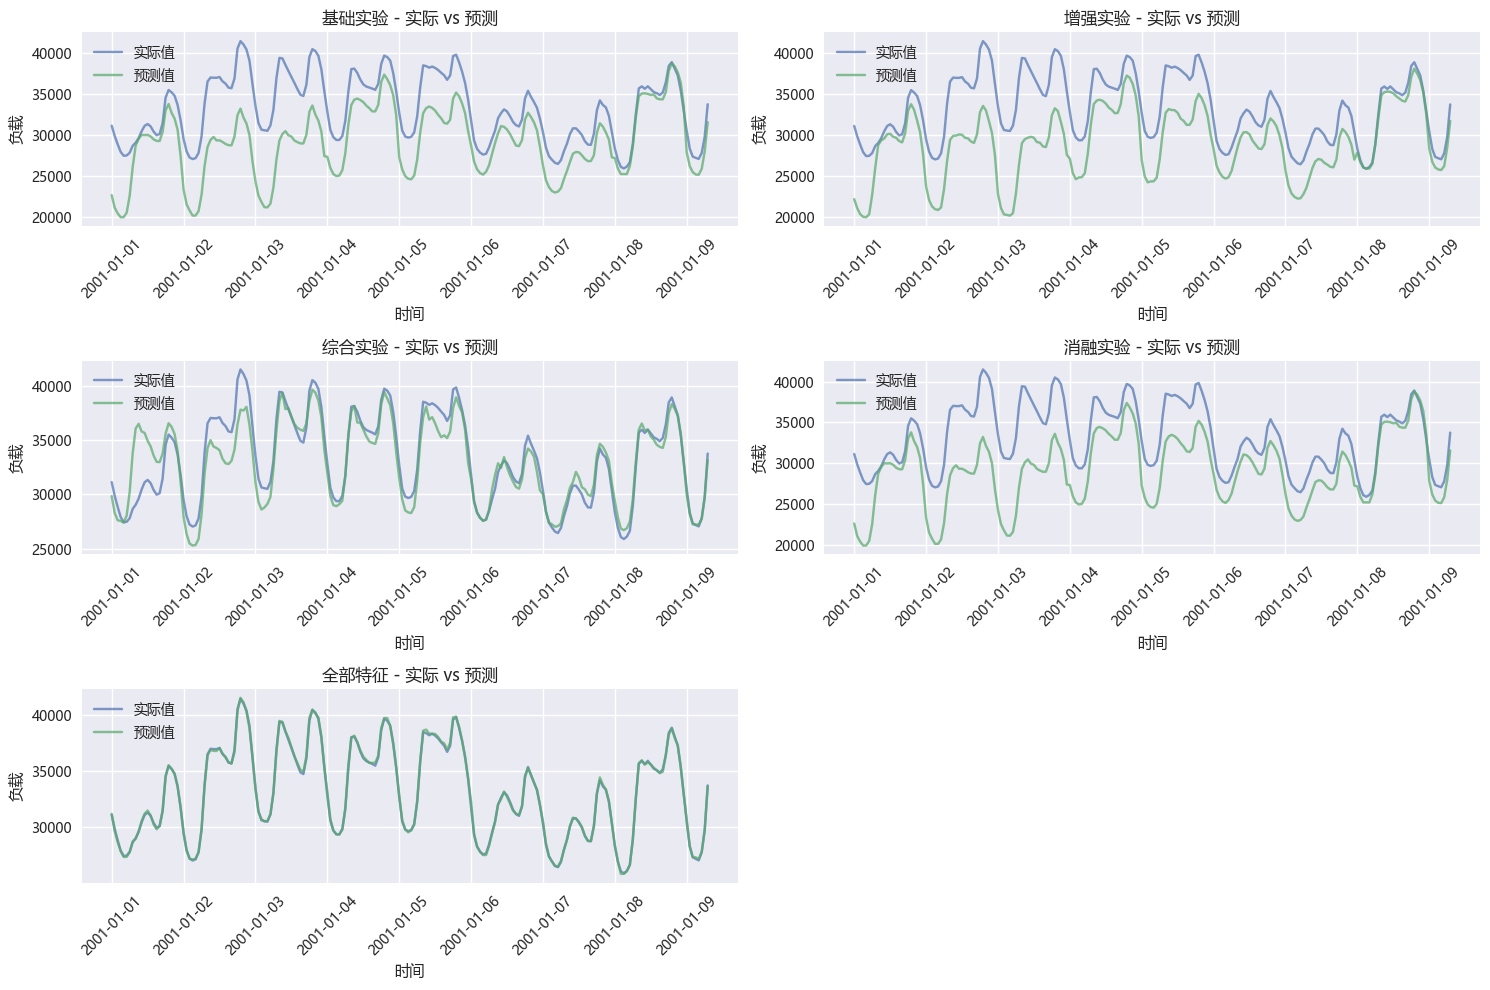

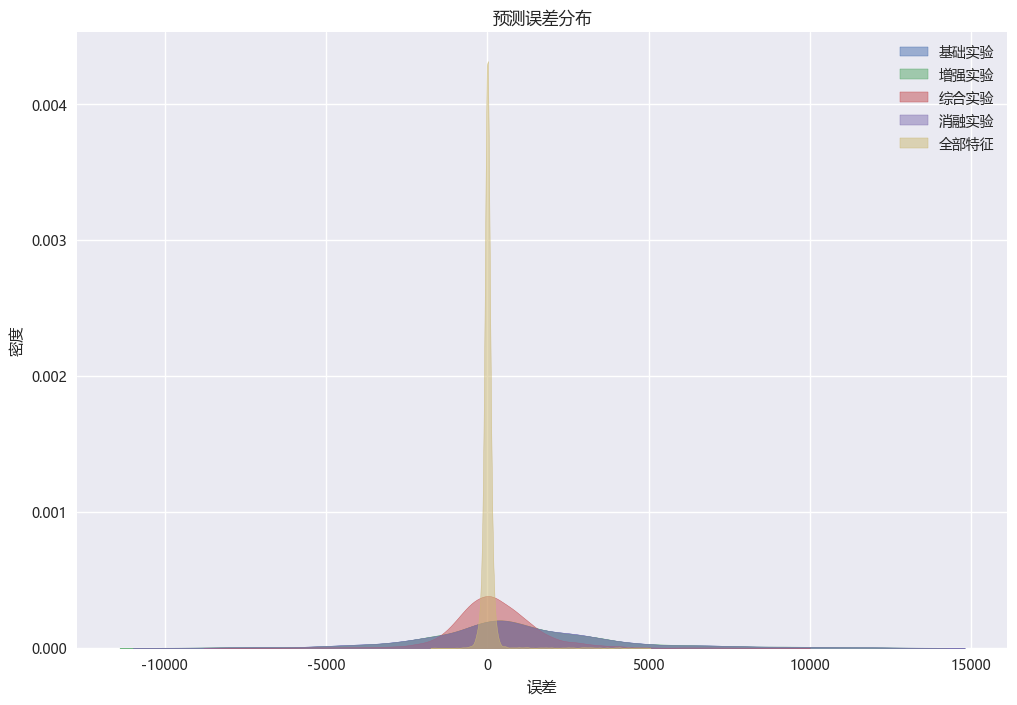

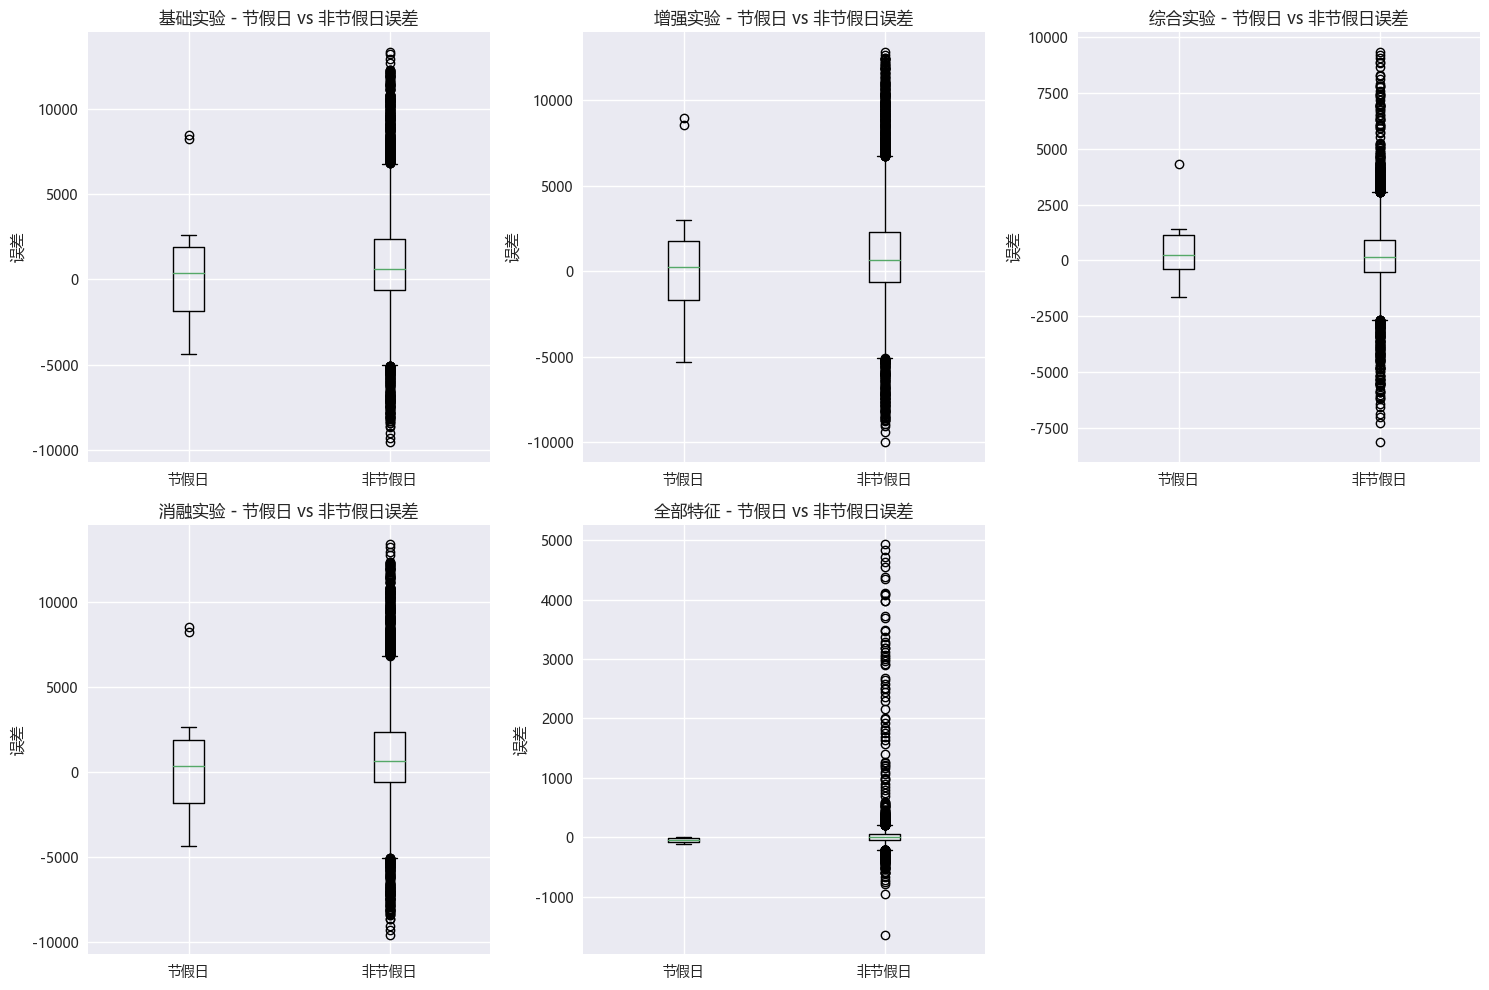

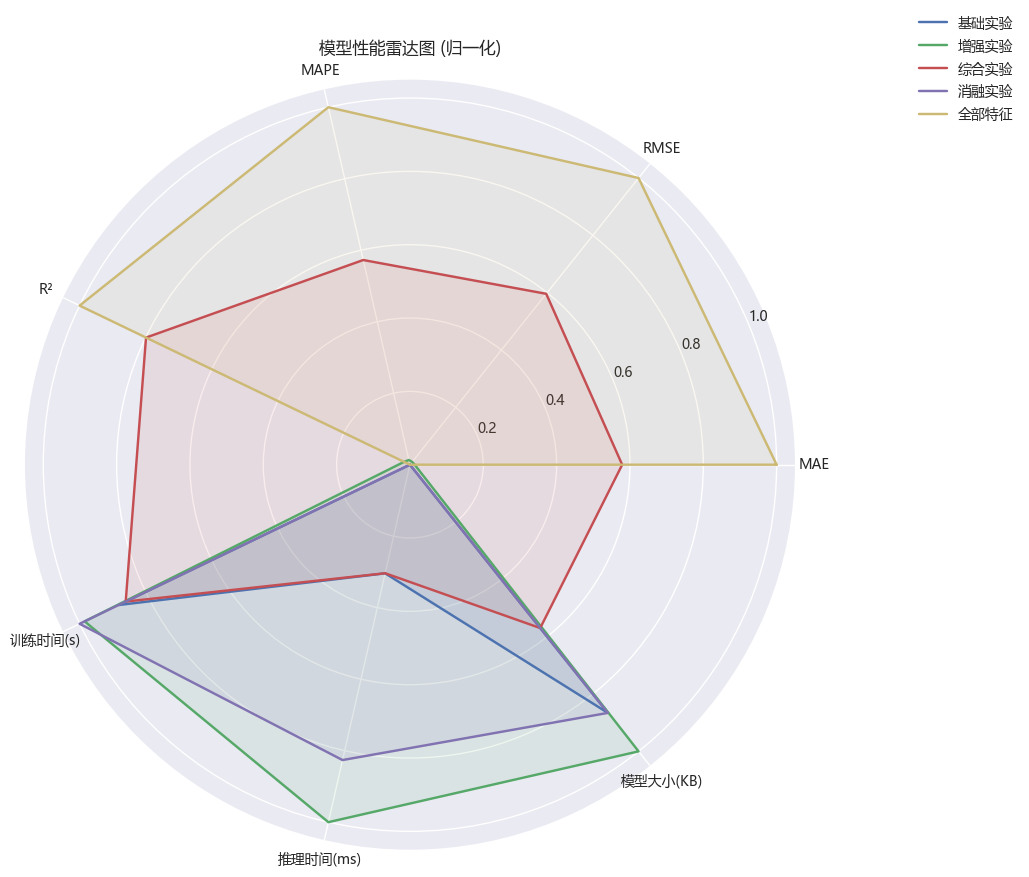

可视化图表已保存到 ../visualizations/ 目录


In [22]:
import joblib
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas.tseries.holiday import USFederalHolidayCalendar
from catboost import CatBoostRegressor

# 创建必要的目录
if not os.path.exists('../models'):
    os.makedirs('../models')
if not os.path.exists('../data/model_results'):
    os.makedirs('../data/model_results')
if not os.path.exists('../visualizations'):
    os.makedirs('../visualizations')

# 定义评估函数
def evaluate_model_detailed(model, X_train, y_train, X_test, y_test, name):
    """
    详细评估模型，包括训练和推理时间
    """
    # 训练时间
    start_time = time.time()
    model.fit(X_train, y_train, verbose=False)  # 训练CatBoost模型
    train_time = time.time() - start_time
    
    # 推理时间
    start_time = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_time
    
    # 计算指标
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    with np.errstate(divide='ignore', invalid='ignore'):
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        # 处理无穷大值
        mape = np.nan if np.isinf(mape) else mape
    r2 = r2_score(y_test, y_pred)
    
    # 模型大小 (保存后计算)
    model_filename = f'../models/Cat_model_{name}.pkl'
    joblib.dump(model, model_filename)  # 保存模型
    model_size = os.path.getsize(model_filename) / 1024  # KB
    
    metrics = {
        '特征集': name,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R²': r2,
        '训练时间(s)': train_time,
        '推理时间(ms)': inference_time * 1000,  # 转换为毫秒
        '模型大小(KB)': model_size
    }
    
    return metrics, y_pred

# 定义可视化函数
def create_visualizations(predictions, results_df):
    """
    创建多种可视化图表
    """
    # 1. 实际 vs 预测曲线（折线图）
    plt.figure(figsize=(15, 10))
    for i, (name, data) in enumerate(predictions.items(), 1):
        plt.subplot(3, 2, i)
        test_data = data['test']
        pred = data['pred']
        
        # 只绘制前200个点以便清晰查看
        plt.plot(test_data.index[:200], test_data['PJM_Load'].values[:200], label='实际值', alpha=0.7)
        plt.plot(test_data.index[:200], pred[:200], label='预测值', alpha=0.7)
        plt.title(f'{name} - 实际 vs 预测')
        plt.xlabel('时间')
        plt.ylabel('负载')
        plt.legend()
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig('../visualizations/Cat_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 2. 预测误差分布图（直方图 / KDE）
    plt.figure(figsize=(12, 8))
    for name, data in predictions.items():
        test_data = data['test']
        pred = data['pred']
        errors = test_data['PJM_Load'].values - pred
        sns.kdeplot(errors, label=name, fill=True, alpha=0.5)
    
    plt.title('预测误差分布')
    plt.xlabel('误差')
    plt.ylabel('密度')
    plt.legend()
    plt.savefig('../visualizations/Cat_error_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 3. 各模型在节假日与非节假日的误差对比（箱线图）
    # 创建节假日日历
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start='2001-01-01', end='2002-12-31')
    
    plt.figure(figsize=(15, 10))
    for i, (name, data) in enumerate(predictions.items(), 1):
        test_data = data['test']
        pred = data['pred']
        errors = test_data['PJM_Load'].values - pred
        
        # 标记节假日
        is_holiday = test_data.index.isin(holidays)
        holiday_errors = errors[is_holiday]
        non_holiday_errors = errors[~is_holiday]
        
        plt.subplot(2, 3, i)
        plt.boxplot([holiday_errors, non_holiday_errors], labels=['节假日', '非节假日'])
        plt.title(f'{name} - 节假日 vs 非节假日误差')
        plt.ylabel('误差')
    
    plt.tight_layout()
    plt.savefig('../visualizations/Cat_holiday_vs_nonholiday_errors.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 5. 模型性能雷达图
    metrics = ['MAE', 'RMSE', 'MAPE', 'R²', '训练时间(s)', '推理时间(ms)', '模型大小(KB)']
    normalized_results = results_df.copy()
    
    # 归一化数据 (对于误差指标，越小越好；对于R²，越大越好)
    for metric in metrics:
        if metric in ['R²']:
            # 对于R²，越大越好，所以直接归一化
            normalized_results[metric] = (normalized_results[metric] - normalized_results[metric].min()) / \
                                        (normalized_results[metric].max() - normalized_results[metric].min())
        else:
            # 对于误差指标，越小越好，所以取反后归一化
            normalized_results[metric] = 1 - (normalized_results[metric] - normalized_results[metric].min()) / \
                                        (normalized_results[metric].max() - normalized_results[metric].min())
    
    # 创建雷达图
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # 闭合雷达图
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    for idx, row in normalized_results.iterrows():
        values = row[metrics].values.tolist()
        values += values[:1]  # 闭合雷达图
        ax.plot(angles, values, label=row['特征集'])
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    ax.set_title('模型性能雷达图 (归一化)')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.savefig('../visualizations/Cat_performance_radar.png', dpi=300, bbox_inches='tight')
    plt.show()

# 对五种特征集进行实验
results = []
predictions = {}

for name, df in datasets.items():
    # 设置索引
    df = df.set_index('Datetime').sort_index()
    
    # 划分训练集和测试集
    train = df.loc[df.index < '2001-01-01']
    test = df.loc[df.index >= '2001-01-01']
    
    # 定义特征和目标
    features = [col for col in df.columns if col != 'PJM_Load']
    X_train = train[features]
    y_train = train['PJM_Load']
    X_test = test[features]
    y_test = test['PJM_Load']
    
    # 训练和评估
    model = CatBoostRegressor(
        iterations=1000,
        learning_rate=0.1,
        depth=6,
        random_seed=42,
        loss_function='MAE',
        verbose=False
    )
    
    metrics, pred = evaluate_model_detailed(model, X_train, y_train, X_test, y_test, name)
    results.append(metrics)
    predictions[name] = {'test': test.copy(), 'pred': pred}
    
    print(f"\n{name} 实验完成")
    print(f"MAE: {metrics['MAE']:.2f}, RMSE: {metrics['RMSE']:.2f}, MAPE: {metrics['MAPE']:.2f}%, R²: {metrics['R²']:.4f}")
    print(f"训练时间: {metrics['训练时间(s)']:.2f}s, 推理时间: {metrics['推理时间(ms)']:.2f}ms, 模型大小: {metrics['模型大小(KB)']:.2f}KB")

# 展示结果对比
results_df = pd.DataFrame(results)
print("\n=== 五种特征集实验结果对比 ===")
print(results_df)

# 保存结果到CSV
results_df.to_csv('../data/model_results/Cat_model_results.csv', index=False)
print("结果已保存到 ../data/model_results/Cat_model_results.csv")

# 创建可视化
print("\n创建可视化图表...")
create_visualizations(predictions, results_df)
print("可视化图表已保存到 ../visualizations/ 目录")


=== 训练默认参数模型: 基础实验 ===

开始对 基础实验 进行超参数调优...
Fitting 3 folds for each of 30 candidates, totalling 90 fits
基础实验 超参数调优完成，耗时: 226.87秒
最佳参数: {'random_strength': 1, 'learning_rate': 0.01, 'l2_leaf_reg': 7, 'iterations': 500, 'depth': 8, 'border_count': 32, 'bagging_temperature': 0}
最佳分数: 13177955.8321 (MSE)


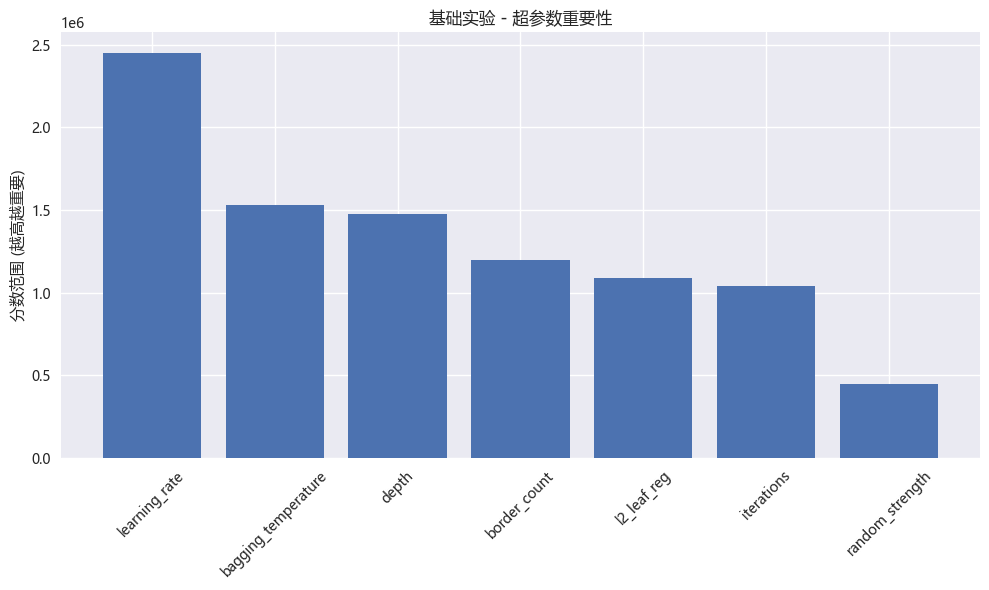


=== 训练调优后模型: 基础实验 ===

基础实验 实验完成
默认参数 - MAE: 2065.68, RMSE: 2882.15, MAPE: 6.59%, R²: 0.7590
调优后 - MAE: 1946.65, RMSE: 2755.98, MAPE: 6.15%, R²: 0.7797
改进 - MAE: 5.76%, RMSE: 4.38%
训练时间: 3.98s, 推理时间: 10.00ms, 模型大小: 2053.77KB

=== 训练默认参数模型: 增强实验 ===

开始对 增强实验 进行超参数调优...
Fitting 3 folds for each of 30 candidates, totalling 90 fits
增强实验 超参数调优完成，耗时: 265.21秒
最佳参数: {'random_strength': 1, 'learning_rate': 0.01, 'l2_leaf_reg': 7, 'iterations': 500, 'depth': 8, 'border_count': 32, 'bagging_temperature': 0}
最佳分数: 13168440.4191 (MSE)


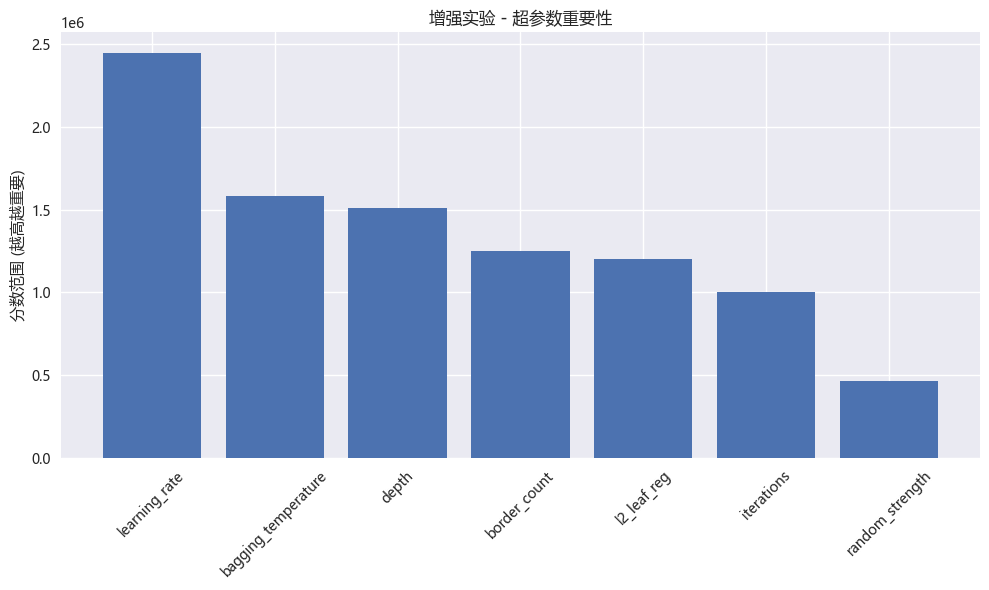


=== 训练调优后模型: 增强实验 ===

增强实验 实验完成
默认参数 - MAE: 2071.07, RMSE: 2886.94, MAPE: 6.60%, R²: 0.7582
调优后 - MAE: 1950.47, RMSE: 2754.60, MAPE: 6.17%, R²: 0.7799
改进 - MAE: 5.82%, RMSE: 4.58%
训练时间: 2.85s, 推理时间: 4.99ms, 模型大小: 2048.80KB

=== 训练默认参数模型: 综合实验 ===

开始对 综合实验 进行超参数调优...
Fitting 3 folds for each of 30 candidates, totalling 90 fits
综合实验 超参数调优完成，耗时: 347.66秒
最佳参数: {'random_strength': 1, 'learning_rate': 0.03, 'l2_leaf_reg': 9, 'iterations': 500, 'depth': 4, 'border_count': 256, 'bagging_temperature': 0.5}
最佳分数: 2786782.8355 (MSE)


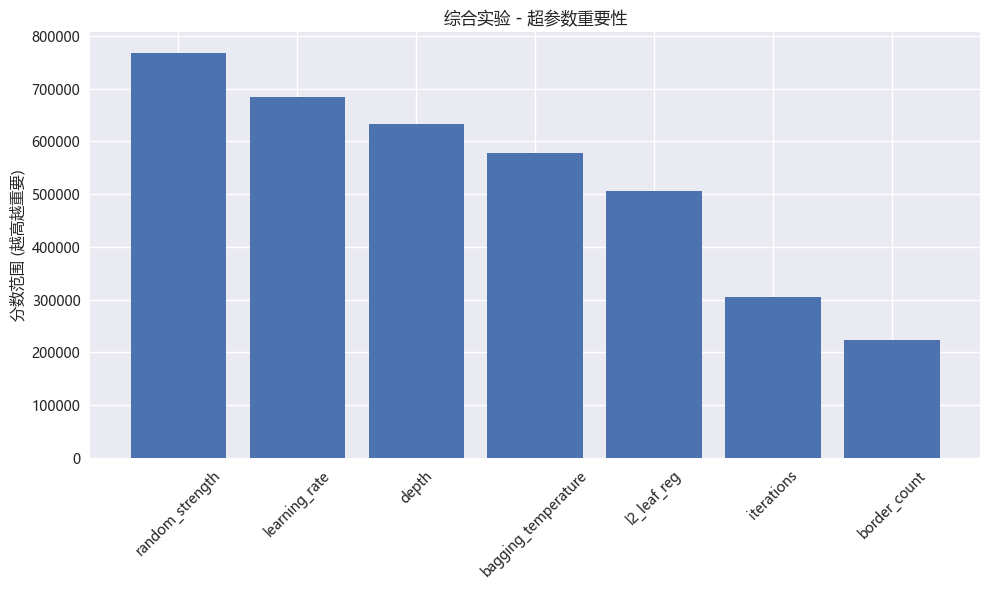


=== 训练调优后模型: 综合实验 ===

综合实验 实验完成
默认参数 - MAE: 964.15, RMSE: 1356.76, MAPE: 3.11%, R²: 0.9466
调优后 - MAE: 1081.63, RMSE: 1477.15, MAPE: 3.50%, R²: 0.9367
改进 - MAE: -12.18%, RMSE: -8.87%
训练时间: 2.71s, 推理时间: 6.00ms, 模型大小: 166.63KB

=== 训练默认参数模型: 消融实验 ===

开始对 消融实验 进行超参数调优...
Fitting 3 folds for each of 30 candidates, totalling 90 fits
消融实验 超参数调优完成，耗时: 214.45秒
最佳参数: {'random_strength': 1, 'learning_rate': 0.01, 'l2_leaf_reg': 7, 'iterations': 500, 'depth': 8, 'border_count': 32, 'bagging_temperature': 0}
最佳分数: 13177955.8321 (MSE)


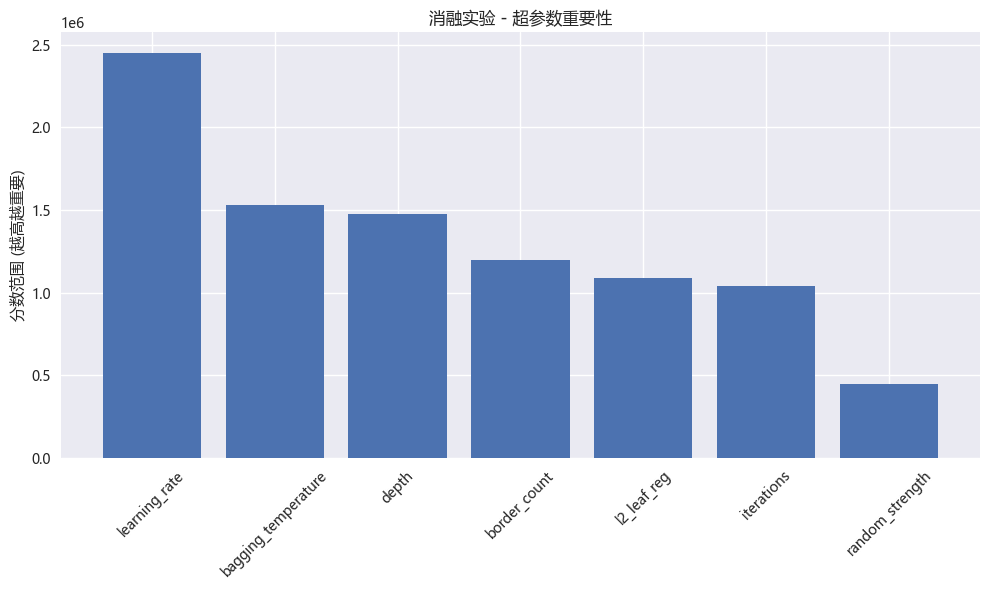


=== 训练调优后模型: 消融实验 ===

消融实验 实验完成
默认参数 - MAE: 2065.68, RMSE: 2882.15, MAPE: 6.59%, R²: 0.7590
调优后 - MAE: 1946.65, RMSE: 2755.98, MAPE: 6.15%, R²: 0.7797
改进 - MAE: 5.76%, RMSE: 4.38%
训练时间: 1.76s, 推理时间: 3.03ms, 模型大小: 2053.77KB

=== 训练默认参数模型: 全部特征 ===

开始对 全部特征 进行超参数调优...
Fitting 3 folds for each of 30 candidates, totalling 90 fits
全部特征 超参数调优完成，耗时: 379.79秒
最佳参数: {'random_strength': 10, 'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 1500, 'depth': 4, 'border_count': 256, 'bagging_temperature': 0}
最佳分数: 86351.5965 (MSE)


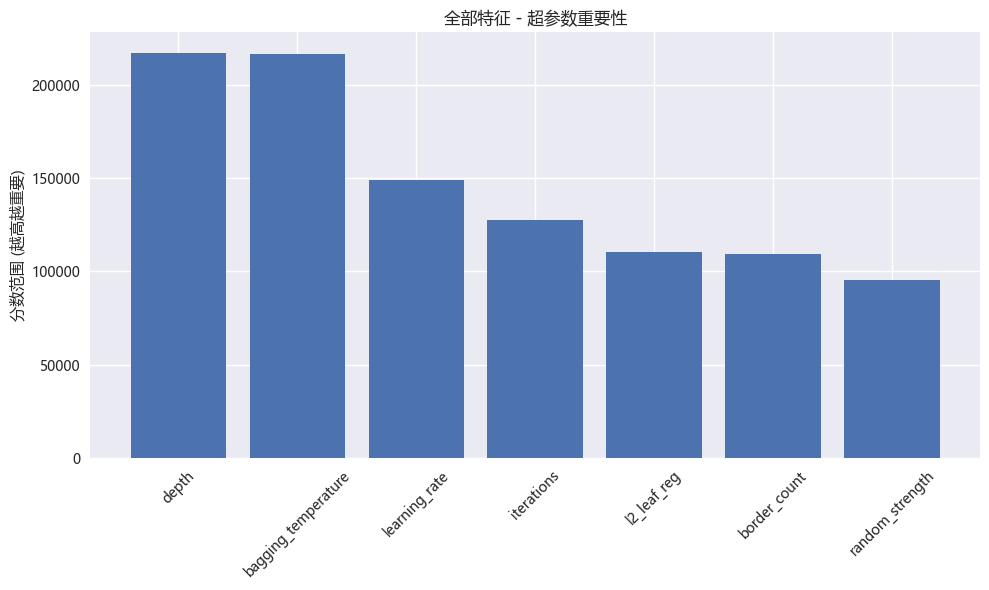


=== 训练调优后模型: 全部特征 ===

全部特征 实验完成
默认参数 - MAE: 67.97, RMSE: 229.70, MAPE: 0.20%, R²: 0.9985
调优后 - MAE: 103.95, RMSE: 237.15, MAPE: 0.33%, R²: 0.9984
改进 - MAE: -52.94%, RMSE: -3.24%
训练时间: 4.42s, 推理时间: 4.02ms, 模型大小: 487.30KB

=== 五种特征集实验结果对比 (调优后) ===
          特征集          MAE         RMSE      MAPE        R²   训练时间(s)  \
0  基础实验_tuned  1946.649569  2755.976898  6.153818  0.779665  3.984781   
1  增强实验_tuned  1950.470582  2754.603442  6.167100  0.779884  2.845027   
2  综合实验_tuned  1081.631918  1477.153038  3.502781  0.936703  2.707082   
3  消融实验_tuned  1946.649569  2755.976898  6.153818  0.779665  1.763664   
4  全部特征_tuned   103.952205   237.150412  0.325597  0.998369  4.423812   

    推理时间(ms)     模型大小(KB)  
0  10.004520  2053.774414  
1   4.992247  2048.800781  
2   6.001472   166.629883  
3   3.027439  2053.774414  
4   4.018545   487.300781  
结果已保存到 ../data/model_results/Cat_model_results_tuned.csv
调优结果已保存到 ../hyperparameter_tuning/Cat_tuning_summary.csv

创建可视化图表...


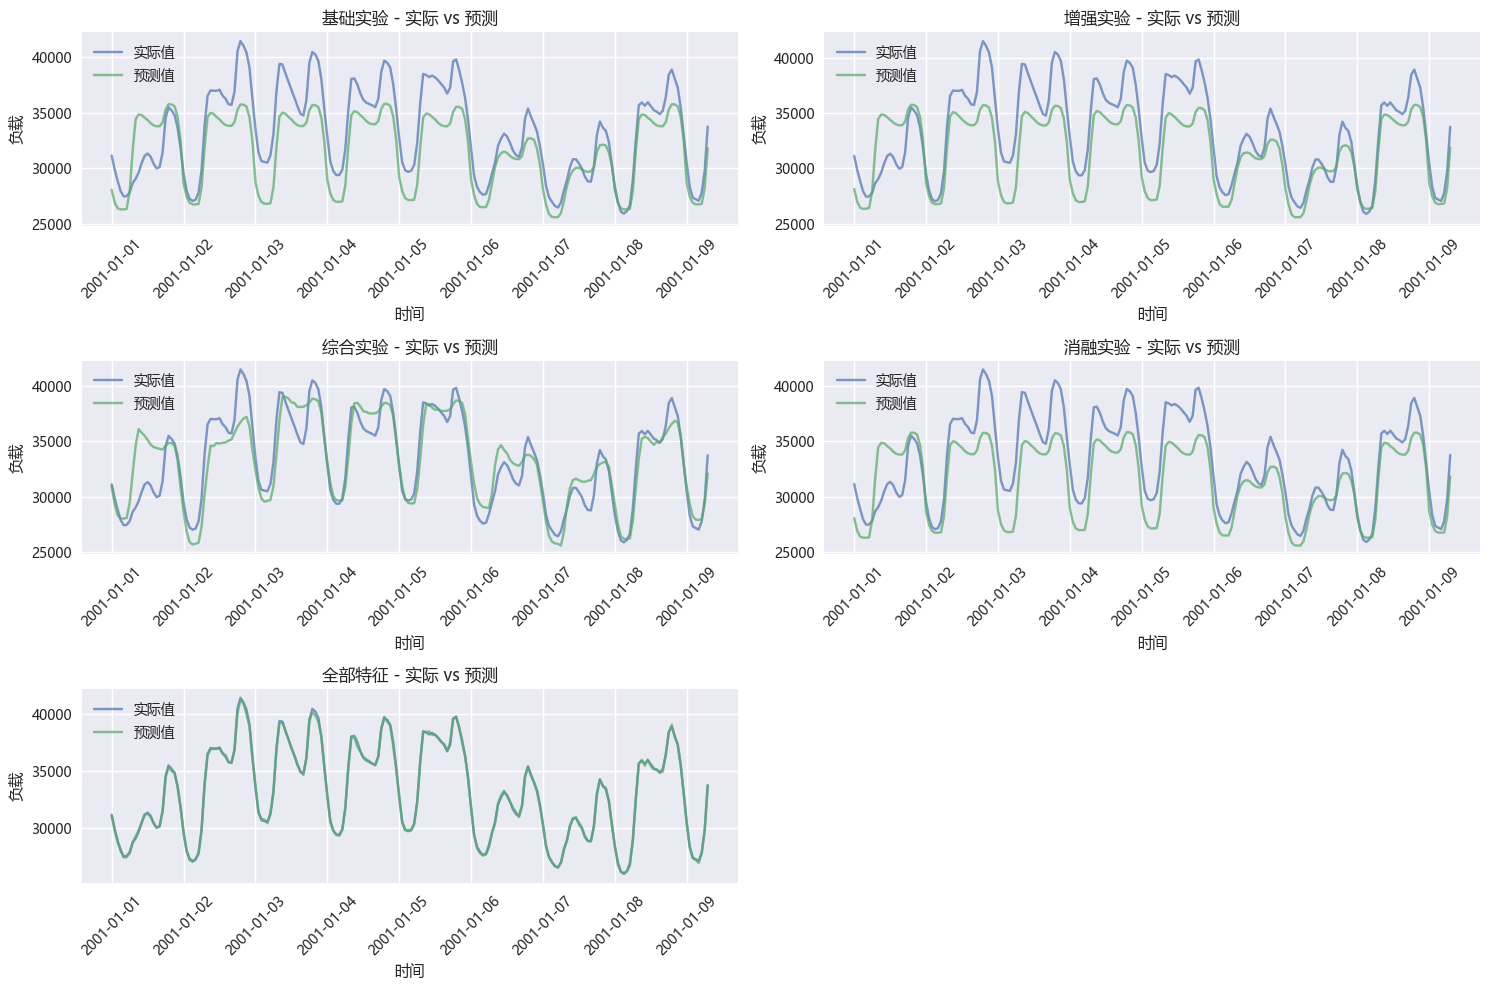

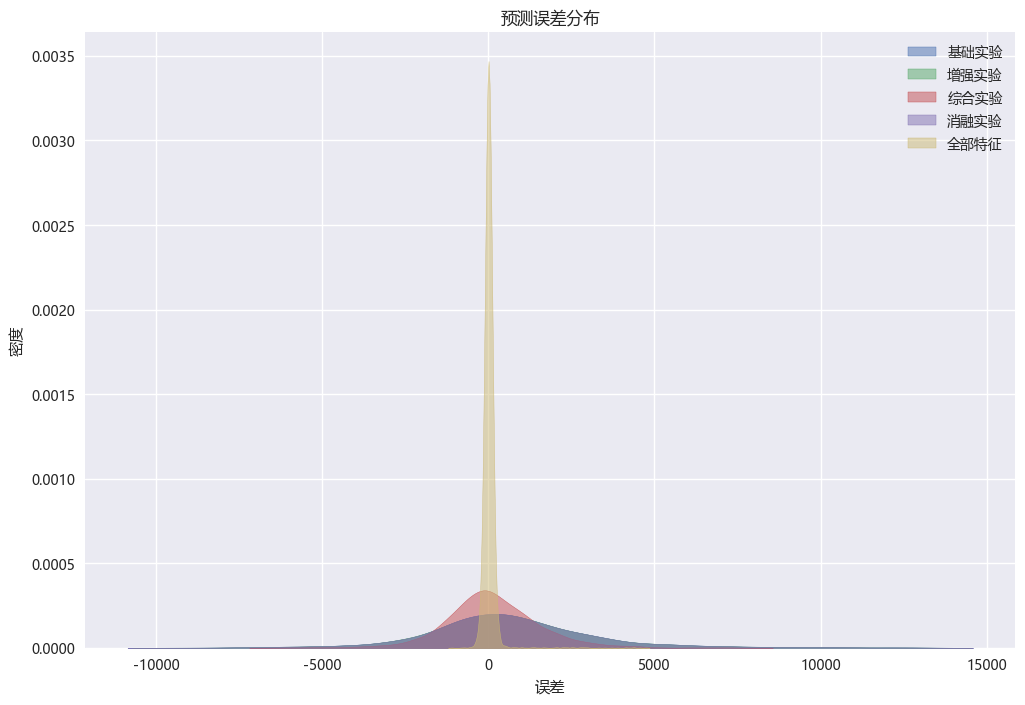

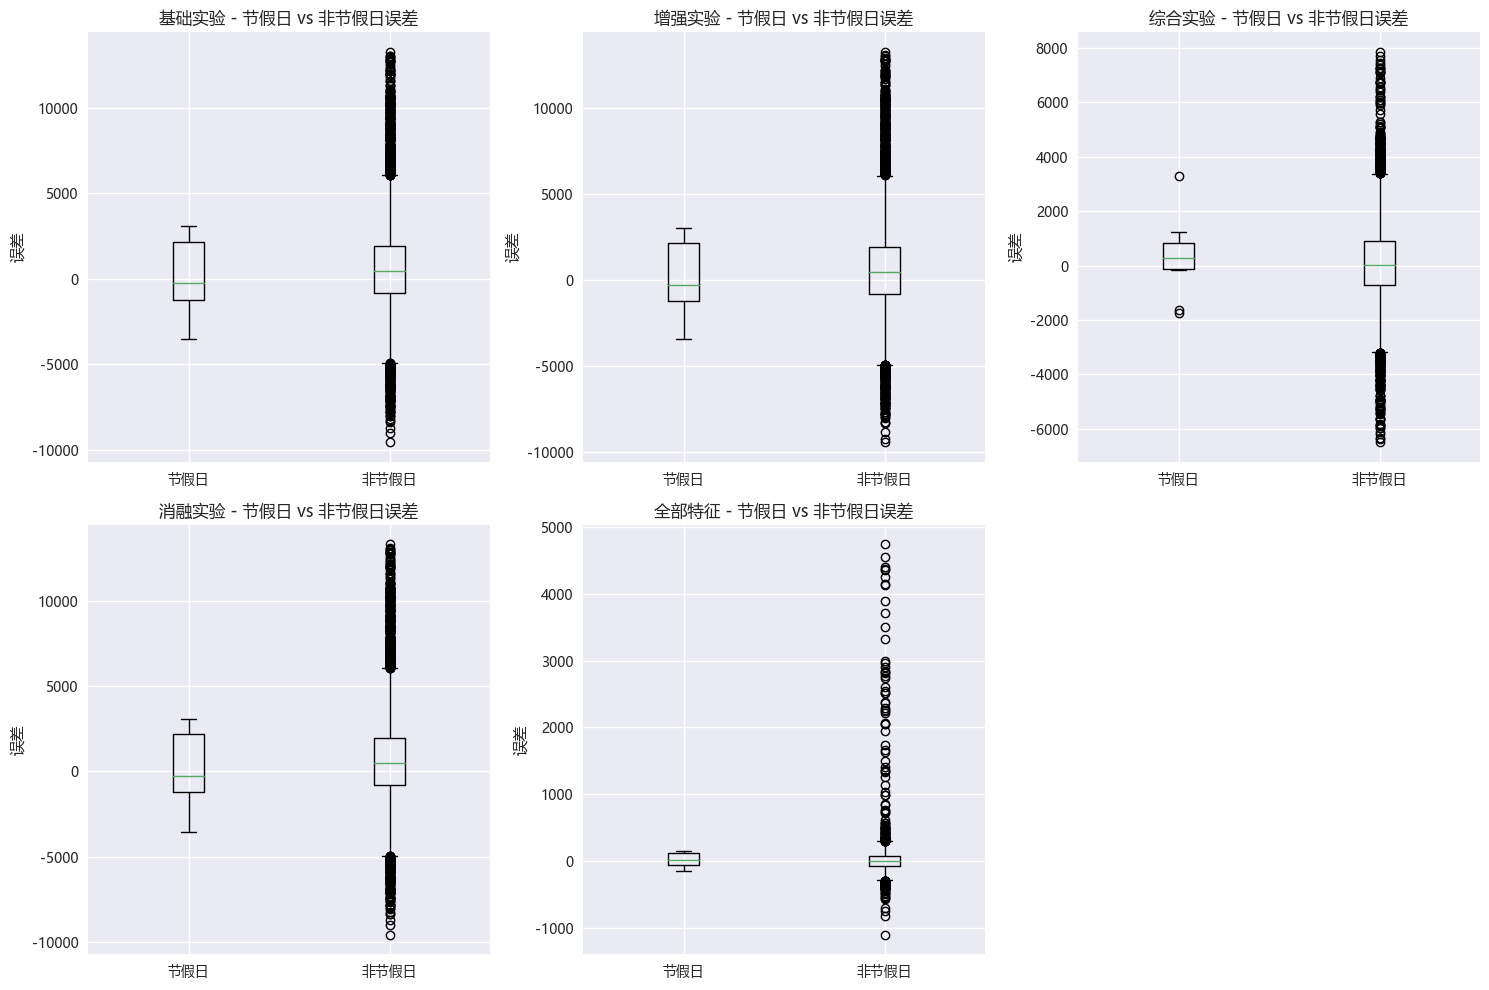

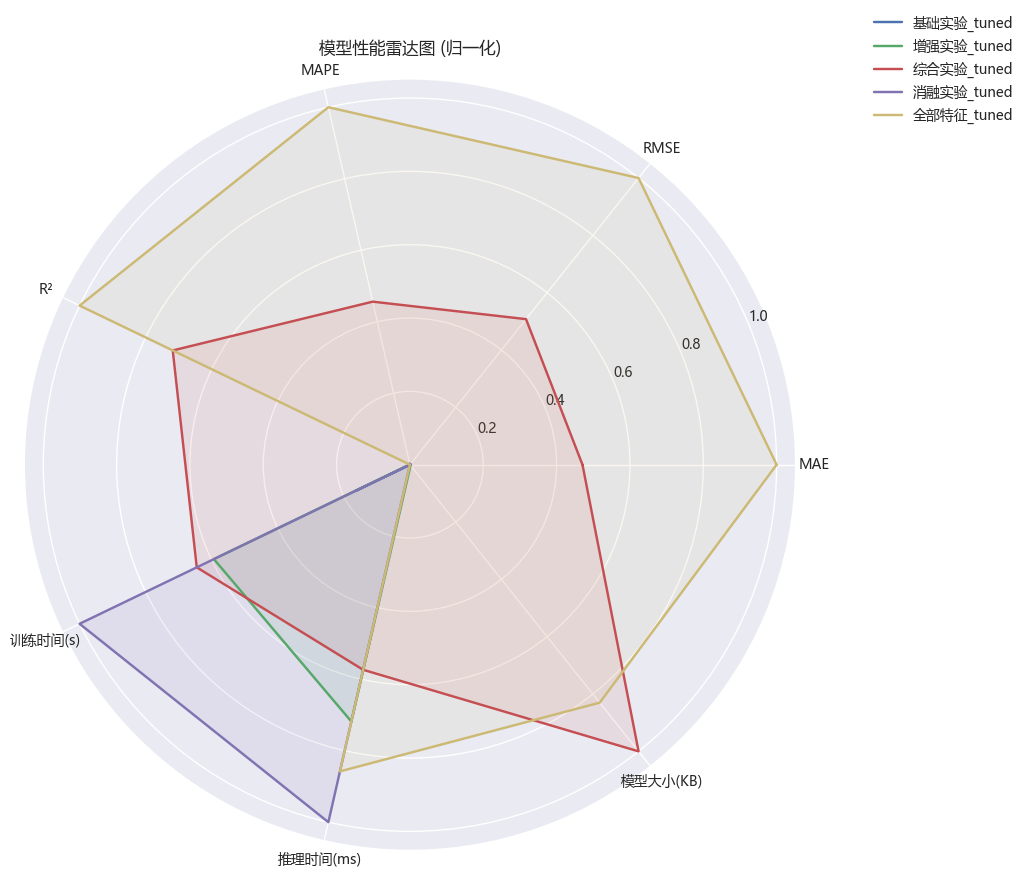

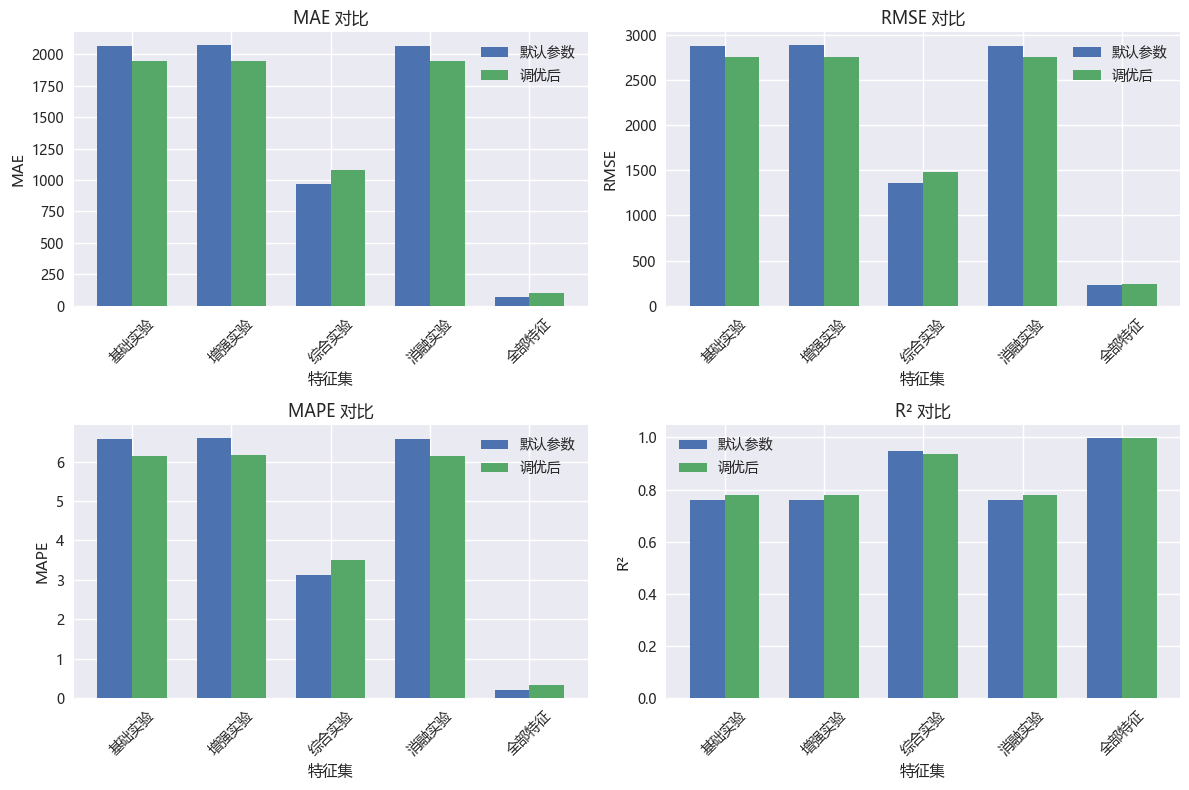

可视化图表已保存到 ../visualizations/ 目录

=== 超参数调优总结 ===

基础实验:
  MAE改进: 5.76%
  RMSE改进: 4.38%
  最佳参数: {'random_strength': 1, 'learning_rate': 0.01, 'l2_leaf_reg': 7, 'iterations': 500, 'depth': 8, 'border_count': 32, 'bagging_temperature': 0}

增强实验:
  MAE改进: 5.82%
  RMSE改进: 4.58%
  最佳参数: {'random_strength': 1, 'learning_rate': 0.01, 'l2_leaf_reg': 7, 'iterations': 500, 'depth': 8, 'border_count': 32, 'bagging_temperature': 0}

综合实验:
  MAE改进: -12.18%
  RMSE改进: -8.87%
  最佳参数: {'random_strength': 1, 'learning_rate': 0.03, 'l2_leaf_reg': 9, 'iterations': 500, 'depth': 4, 'border_count': 256, 'bagging_temperature': 0.5}

消融实验:
  MAE改进: 5.76%
  RMSE改进: 4.38%
  最佳参数: {'random_strength': 1, 'learning_rate': 0.01, 'l2_leaf_reg': 7, 'iterations': 500, 'depth': 8, 'border_count': 32, 'bagging_temperature': 0}

全部特征:
  MAE改进: -52.94%
  RMSE改进: -3.24%
  最佳参数: {'random_strength': 10, 'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 1500, 'depth': 4, 'border_count': 256, 'bagging_temperature': 0}


In [23]:
import joblib
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas.tseries.holiday import USFederalHolidayCalendar
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit

# 创建必要的目录
if not os.path.exists('../models'):
    os.makedirs('../models')
if not os.path.exists('../data/model_results'):
    os.makedirs('../data/model_results')
if not os.path.exists('../visualizations'):
    os.makedirs('../visualizations')
if not os.path.exists('../hyperparameter_tuning'):
    os.makedirs('../hyperparameter_tuning')

# 定义评估函数
def evaluate_model_detailed(model, X_train, y_train, X_test, y_test, name):
    """
    详细评估模型，包括训练和推理时间
    """
    # 训练时间
    start_time = time.time()
    model.fit(X_train, y_train, verbose=False)
    train_time = time.time() - start_time
    
    # 推理时间
    start_time = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_time
    
    # 计算指标
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    with np.errstate(divide='ignore', invalid='ignore'):
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        # 处理无穷大值
        mape = np.nan if np.isinf(mape) else mape
    r2 = r2_score(y_test, y_pred)
    
    # 模型大小 (保存后计算)
    model_filename = f'../models/Cat_tuning_model_{name}.pkl'
    joblib.dump(model, model_filename)
    model_size = os.path.getsize(model_filename) / 1024  # KB
    
    metrics = {
        '特征集': name,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R²': r2,
        '训练时间(s)': train_time,
        '推理时间(ms)': inference_time * 1000,  # 转换为毫秒
        '模型大小(KB)': model_size
    }
    
    return metrics, y_pred

# 定义超参数调优函数
def hyperparameter_tuning(X_train, y_train, name, method='random'):
    """
    执行超参数调优
    method: 'random' 或 'grid'
    """
    print(f"\n开始对 {name} 进行超参数调优...")
    
    # 定义CatBoost参数空间
    param_dist = {
        'iterations': [500, 1000, 1500, 2000],
        'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
        'depth': [4, 6, 8, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'border_count': [32, 64, 128, 256],
        'bagging_temperature': [0, 0.5, 1, 2],
        'random_strength': [1, 2, 5, 10]
    }
    
    # 创建基础模型
    model = CatBoostRegressor(random_seed=42, verbose=False)
    
    # 使用时间序列交叉验证
    tscv = TimeSeriesSplit(n_splits=3)
    
    # 选择调优方法
    if method == 'random':
        # 随机搜索
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_dist,
            n_iter=30,  # 随机尝试30组参数
            scoring='neg_mean_squared_error',
            cv=tscv,
            verbose=1,
            n_jobs=-1,
            random_state=42
        )
    else:
        # 网格搜索 (简化版，因为完整网格搜索计算量太大)
        param_grid = {
            'iterations': [1000, 1500],
            'learning_rate': [0.03, 0.05],
            'depth': [6, 8],
            'l2_leaf_reg': [3, 5]
        }
        search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring='neg_mean_squared_error',
            cv=tscv,
            verbose=1,
            n_jobs=-1
        )
    
    # 执行搜索
    start_time = time.time()
    search.fit(X_train, y_train)
    tuning_time = time.time() - start_time
    
    print(f"{name} 超参数调优完成，耗时: {tuning_time:.2f}秒")
    print(f"最佳参数: {search.best_params_}")
    print(f"最佳分数: {-search.best_score_:.4f} (MSE)")
    
    # 保存调优结果
    tuning_results = pd.DataFrame(search.cv_results_)
    tuning_results.to_csv(f'../hyperparameter_tuning/Cat_tuning_results_{name}.csv', index=False)
    
    # 绘制参数重要性图
    plot_hyperparameter_importance(tuning_results, name)
    
    return search.best_estimator_, search.best_params_

def plot_hyperparameter_importance(tuning_results, name):
    """
    绘制超参数重要性图
    """
    # 提取参数和对应的分数
    param_columns = [col for col in tuning_results.columns if col.startswith('param_')]
    scores = tuning_results['mean_test_score']
    
    # 计算每个参数的重要性
    param_importance = {}
    for param in param_columns:
        # 分组计算参数值的平均分数
        grouped = tuning_results.groupby(param)['mean_test_score'].mean()
        # 重要性 = 最高分 - 最低分
        importance = grouped.max() - grouped.min()
        param_importance[param.replace('param_', '')] = importance
    
    # 绘制条形图
    plt.figure(figsize=(10, 6))
    param_names = list(param_importance.keys())
    importance_values = list(param_importance.values())
    
    # 排序
    sorted_idx = np.argsort(importance_values)[::-1]
    param_names = [param_names[i] for i in sorted_idx]
    importance_values = [importance_values[i] for i in sorted_idx]
    
    plt.bar(range(len(param_names)), importance_values)
    plt.xticks(range(len(param_names)), param_names, rotation=45)
    plt.title(f'{name} - 超参数重要性')
    plt.ylabel('分数范围 (越高越重要)')
    plt.tight_layout()
    plt.savefig(f'../hyperparameter_tuning/Cat_param_importance_{name}.png', dpi=300, bbox_inches='tight')
    plt.show()

# 定义可视化函数
def create_visualizations(predictions, results_df, tuning_results=None):
    """
    创建多种可视化图表
    """
    # 1. 实际 vs 预测曲线（折线图）
    plt.figure(figsize=(15, 10))
    for i, (name, data) in enumerate(predictions.items(), 1):
        plt.subplot(3, 2, i)
        test_data = data['test']
        pred = data['pred']
        
        # 只绘制前200个点以便清晰查看
        plt.plot(test_data.index[:200], test_data['PJM_Load'].values[:200], label='实际值', alpha=0.7)
        plt.plot(test_data.index[:200], pred[:200], label='预测值', alpha=0.7)
        plt.title(f'{name} - 实际 vs 预测')
        plt.xlabel('时间')
        plt.ylabel('负载')
        plt.legend()
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig('../visualizations/Cat_tuning_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 2. 预测误差分布图（直方图 / KDE）
    plt.figure(figsize=(12, 8))
    for name, data in predictions.items():
        test_data = data['test']
        pred = data['pred']
        errors = test_data['PJM_Load'].values - pred
        sns.kdeplot(errors, label=name, fill=True, alpha=0.5)
    
    plt.title('预测误差分布')
    plt.xlabel('误差')
    plt.ylabel('密度')
    plt.legend()
    plt.savefig('../visualizations/Cat_error_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 3. 各模型在节假日与非节假日的误差对比（箱线图）
    # 创建节假日日历
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start='2001-01-01', end='2002-12-31')
    
    plt.figure(figsize=(15, 10))
    for i, (name, data) in enumerate(predictions.items(), 1):
        test_data = data['test']
        pred = data['pred']
        errors = test_data['PJM_Load'].values - pred
        
        # 标记节假日
        is_holiday = test_data.index.isin(holidays)
        holiday_errors = errors[is_holiday]
        non_holiday_errors = errors[~is_holiday]
        
        plt.subplot(2, 3, i)
        plt.boxplot([holiday_errors, non_holiday_errors], labels=['节假日', '非节假日'])
        plt.title(f'{name} - 节假日 vs 非节假日误差')
        plt.ylabel('误差')
    
    plt.tight_layout()
    plt.savefig('../visualizations/Cat_tuning_holiday_vs_nonholiday_errors.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 5. 模型性能雷达图
    metrics = ['MAE', 'RMSE', 'MAPE', 'R²', '训练时间(s)', '推理时间(ms)', '模型大小(KB)']
    normalized_results = results_df.copy()
    
    # 归一化数据 (对于误差指标，越小越好；对于R²，越大越好)
    for metric in metrics:
        if metric in ['R²']:
            # 对于R²，越大越好，所以直接归一化
            normalized_results[metric] = (normalized_results[metric] - normalized_results[metric].min()) / \
                                        (normalized_results[metric].max() - normalized_results[metric].min())
        else:
            # 对于误差指标，越小越好，所以取反后归一化
            normalized_results[metric] = 1 - (normalized_results[metric] - normalized_results[metric].min()) / \
                                        (normalized_results[metric].max() - normalized_results[metric].min())
    
    # 创建雷达图
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # 闭合雷达图
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    for idx, row in normalized_results.iterrows():
        values = row[metrics].values.tolist()
        values += values[:1]  # 闭合雷达图
        ax.plot(angles, values, label=row['特征集'])
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    ax.set_title('模型性能雷达图 (归一化)')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.savefig('../visualizations/Cat_tuning_performance_radar.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 6. 如果有调优结果，比较调优前后的性能
    if tuning_results:
        plt.figure(figsize=(12, 8))
        metrics_to_compare = ['MAE', 'RMSE', 'MAPE', 'R²']
        
        for i, metric in enumerate(metrics_to_compare, 1):
            plt.subplot(2, 2, i)
            
            # 提取默认参数和调优后的性能
            default_metrics = []
            tuned_metrics = []
            names = []
            
            for name in tuning_results:
                if f'default_{metric}' in tuning_results[name] and f'tuned_{metric}' in tuning_results[name]:
                    default_metrics.append(tuning_results[name][f'default_{metric}'])
                    tuned_metrics.append(tuning_results[name][f'tuned_{metric}'])
                    names.append(name)
            
            x = np.arange(len(names))
            width = 0.35
            
            plt.bar(x - width/2, default_metrics, width, label='默认参数')
            plt.bar(x + width/2, tuned_metrics, width, label='调优后')
            
            plt.xlabel('特征集')
            plt.ylabel(metric)
            plt.title(f'{metric} 对比')
            plt.xticks(x, names, rotation=45)
            plt.legend()
        
        plt.tight_layout()
        plt.savefig('../visualizations/Cat_tuning_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()

# 对五种特征集进行实验（包含超参数调优）
results = []
predictions = {}
tuning_results = {}  # 存储调优前后的性能对比

for name, df in datasets.items():
    # 设置索引
    df = df.set_index('Datetime').sort_index()
    
    # 划分训练集和测试集
    train = df.loc[df.index < '2001-01-01']
    test = df.loc[df.index >= '2001-01-01']
    
    # 定义特征和目标
    features = [col for col in df.columns if col != 'PJM_Load']
    X_train = train[features]
    y_train = train['PJM_Load']
    X_test = test[features]
    y_test = test['PJM_Load']
    
    # 1. 先用默认参数训练模型作为基准
    print(f"\n=== 训练默认参数模型: {name} ===")
    default_model = CatBoostRegressor(
        iterations=1000,
        learning_rate=0.03,
        depth=6,
        l2_leaf_reg=3,
        random_seed=42,
        verbose=False
    )
    
    default_metrics, default_pred = evaluate_model_detailed(default_model, X_train, y_train, X_test, y_test, f"{name}_default")
    
    # 2. 进行超参数调优
    tuned_model, best_params = hyperparameter_tuning(X_train, y_train, name, method='random')
    
    # 3. 使用最佳参数训练最终模型
    print(f"\n=== 训练调优后模型: {name} ===")
    tuned_metrics, tuned_pred = evaluate_model_detailed(tuned_model, X_train, y_train, X_test, y_test, f"{name}_tuned")
    
    # 存储调优前后的性能对比
    tuning_results[name] = {
        'default_MAE': default_metrics['MAE'],
        'default_RMSE': default_metrics['RMSE'],
        'default_MAPE': default_metrics['MAPE'],
        'default_R²': default_metrics['R²'],
        'tuned_MAE': tuned_metrics['MAE'],
        'tuned_RMSE': tuned_metrics['RMSE'],
        'tuned_MAPE': tuned_metrics['MAPE'],
        'tuned_R²': tuned_metrics['R²'],
        'improvement_MAE': (default_metrics['MAE'] - tuned_metrics['MAE']) / default_metrics['MAE'] * 100,
        'improvement_RMSE': (default_metrics['RMSE'] - tuned_metrics['RMSE']) / default_metrics['RMSE'] * 100,
        'best_params': best_params
    }
    
    # 使用调优后的模型作为最终模型
    results.append(tuned_metrics)
    predictions[name] = {'test': test.copy(), 'pred': tuned_pred}
    
    print(f"\n{name} 实验完成")
    print(f"默认参数 - MAE: {default_metrics['MAE']:.2f}, RMSE: {default_metrics['RMSE']:.2f}, MAPE: {default_metrics['MAPE']:.2f}%, R²: {default_metrics['R²']:.4f}")
    print(f"调优后 - MAE: {tuned_metrics['MAE']:.2f}, RMSE: {tuned_metrics['RMSE']:.2f}, MAPE: {tuned_metrics['MAPE']:.2f}%, R²: {tuned_metrics['R²']:.4f}")
    print(f"改进 - MAE: {tuning_results[name]['improvement_MAE']:.2f}%, RMSE: {tuning_results[name]['improvement_RMSE']:.2f}%")
    print(f"训练时间: {tuned_metrics['训练时间(s)']:.2f}s, 推理时间: {tuned_metrics['推理时间(ms)']:.2f}ms, 模型大小: {tuned_metrics['模型大小(KB)']:.2f}KB")

# 展示结果对比
results_df = pd.DataFrame(results)
print("\n=== 五种特征集实验结果对比 (调优后) ===")
print(results_df)

# 保存结果到CSV
results_df.to_csv('../data/model_results/Cat_model_results_tuned.csv', index=False)
print("结果已保存到 ../data/model_results/Cat_model_results_tuned.csv")

# 保存调优结果
tuning_df = pd.DataFrame(tuning_results).T
tuning_df.to_csv('../hyperparameter_tuning/Cat_tuning_summary.csv', index=True)
print("调优结果已保存到 ../hyperparameter_tuning/Cat_tuning_summary.csv")

# 创建可视化
print("\n创建可视化图表...")
create_visualizations(predictions, results_df, tuning_results)
print("可视化图表已保存到 ../visualizations/ 目录")

# 输出调优总结
print("\n=== 超参数调优总结 ===")
for name, result in tuning_results.items():
    print(f"\n{name}:")
    print(f"  MAE改进: {result['improvement_MAE']:.2f}%")
    print(f"  RMSE改进: {result['improvement_RMSE']:.2f}%")
    print(f"  最佳参数: {result['best_params']}")